<a href="https://colab.research.google.com/github/thienan99dt/TrafficSignDetection/blob/master/TrafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Flatten, Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [0]:
PATH = '/content/drive/My Drive/TrafficSign/'
data_folder = PATH + 'data'

In [0]:
#!unzip -q /content/drive/My\ Drive/TrafficSign/traffic-signs-data.zip -d $data_folder

In [0]:
train_link = data_folder + '/train.p'
valid_link = data_folder + '/valid.p'
test_link = data_folder + '/test.p'

In [0]:
import pickle

with open(train_link, mode="rb") as f:
  train = pickle.load(f)

with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)
  
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [0]:
train['labels'][:10]

array([41, 41, 41, 41, 41, 41, 41, 41, 41, 41], dtype=uint8)

In [0]:
X_train, y_train, X_valid, y_valid = train['features']/255.0, train['labels'], valid['features']/255.0, valid['labels']
X_test, y_test = test['features']/255.0, test['labels']

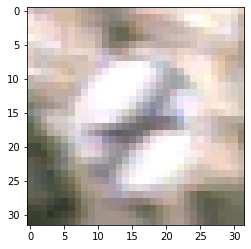

In [8]:
plt.imshow(X_train[39])

In [9]:
np.array(X_train[39]).shape

(32, 32, 3)

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [0]:
class_names = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [0]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

X_valid, y_valid = shuffle(X_valid, y_valid)

X_test, y_test = shuffle(X_test, y_test)

In [20]:
class_names[y_train[4]]

'Speed limit (30km/h)'

In [0]:
labels = [v for k,v in class_names.items()]

In [0]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_valid = lb.fit_transform(y_valid)
y_test = lb.fit_transform(y_test)


In [0]:
width = 32
height= 32
num_classes = len(class_names)
input_shape = (width,height,3)

In [0]:
aug = ImageDataGenerator(rotation_range=15, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

In [34]:
model = Sequential()
model.add(Conv2D(64, 3, padding="same", activation = 'relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, 16, padding="same", activation = 'relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(10, 16, padding="same", activation = 'relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(optimizer='sgd', loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        524320    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 10)          81930     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 10)         

In [0]:
batch_size = 64
num_epochs = 30

In [36]:
history = model.fit_generator(aug.flow(X_train, y_train, batch_size=batch_size), epochs=num_epochs, steps_per_epoch=X_train.shape[0]//batch_size, validation_data=(X_valid,y_valid),verbose =1)

Epoch 1/30
543/543 [==============================] - 30s 54ms/step - loss: 2.9100 - acc: 0.2214 - val_loss: 2.6302 - val_acc: 0.2741
Epoch 2/30
543/543 [==============================] - 28s 52ms/step - loss: 1.9640 - acc: 0.4394 - val_loss: 1.7444 - val_acc: 0.4687
Epoch 3/30
543/543 [==============================] - 29s 53ms/step - loss: 1.4468 - acc: 0.5690 - val_loss: 1.4778 - val_acc: 0.5338
Epoch 4/30
543/543 [==============================] - 28s 52ms/step - loss: 1.1343 - acc: 0.6537 - val_loss: 1.3062 - val_acc: 0.6016
Epoch 5/30
543/543 [==============================] - 29s 53ms/step - loss: 0.9213 - acc: 0.7180 - val_loss: 1.1397 - val_acc: 0.6351
Epoch 6/30
543/543 [==============================] - 28s 52ms/step - loss: 0.7739 - acc: 0.7599 - val_loss: 1.1927 - val_acc: 0.6408
Epoch 7/30
543/543 [==============================] - 29s 53ms/step - loss: 0.6590 - acc: 0.7941 - val_loss: 1.0252 - val_acc: 0.6658
Epoch 8/30
543/543 [==============================] - 29s 53ms

In [0]:
predictions = model.predict_classes(X_test, batch_size = batch_size)

In [38]:
predictions

array([ 5, 10, 13, ...,  9, 15, 17])

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test.argmax(axis=1), predictions))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69        60
           1       0.86      0.85      0.86       720
           2       0.77      0.86      0.81       750
           3       0.84      0.86      0.85       450
           4       0.93      0.91      0.92       660
           5       0.74      0.85      0.79       630
           6       0.76      0.88      0.82       150
           7       0.95      0.79      0.86       450
           8       0.93      0.84      0.88       450
           9       0.97      0.94      0.95       480
          10       0.95      0.94      0.94       660
          11       0.88      0.86      0.87       420
          12       0.91      0.86      0.88       690
          13       0.95      0.98      0.97       720
          14       1.00      1.00      1.00       270
          15       0.95      0.97      0.96       210
          16       0.94      1.00      0.97       150
          17       1.00    

In [47]:
cm = confusion_matrix(y_test.argmax(axis = 1), predictions)
np.set_printoptions(threshold=np.inf)
print(cm)

[[ 41   5   1   0  11   0   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [ 14 612  68   2   2  20   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0  48 642  20   4  13   0   0   1   0   0   0   0   2   0  11   0   0
    0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1
    0   0   7   0   0   0   0]
 [  0   5  19 386   0  36   1   0   0   1   1   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  2  30  10   6 599   4   0   1   1   0   0   1   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   5   0   0   0   0]
 [  0   2  56  20   2 534   2   6   5   0   2   0   0   0   0   0   0   0
    0   0   0   0   0   1   0  

In [40]:
len(X_test)

12630

My prediction:  General caution


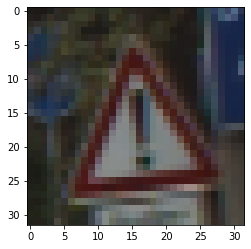

In [41]:
i = 1234
result1 = model.predict_classes(X_test[i:i+1])
plt.imshow(X_test[i], cmap = plt.cm.binary)
print("My prediction: ",labels[int(result1)])

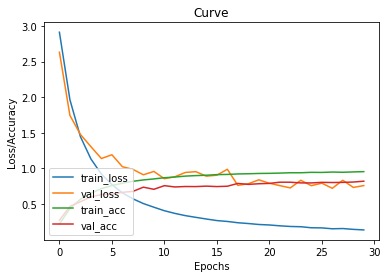

In [43]:
n = np.arange(0, num_epochs)
plt.plot(n, history.history["loss"], label="train_loss")
plt.plot(n, history.history["val_loss"], label="val_loss")
plt.plot(n, history.history["acc"], label="train_acc")
plt.plot(n, history.history["val_acc"], label="val_acc")
plt.title("Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")